In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose


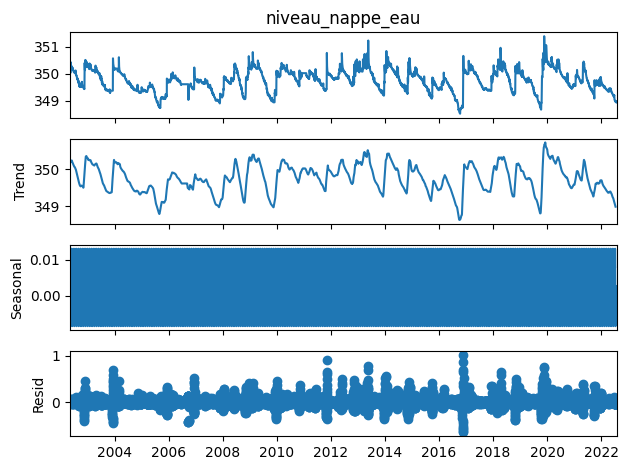

In [ ]:


df = pd.read_csv("merged_X142000101_v2.csv")

df["Date"] = pd.to_datetime(df["Date"], format="%Y%m%d")
df.set_index("Date", inplace=True)

y = df["niveau_nappe_eau"]
X = df.drop(columns=["niveau_nappe_eau"])
y = y.astype(float)
X = X.astype(float)
X = X.asfreq('D', method='pad')
y = y.asfreq('D', method='pad')

X_train = X['2016':'2020']
y_train = y['2016':'2020']
X_test = X['2021':]
y_test = y['2021':]

    order=(1,1,1),
    seasonal_order=(1,1,1,30),
decomposition = seasonal_decompose(y, model='additive', period=30)
decomposition.plot()
plt.show()





In [4]:
y_train.head()


Date
2016-01-01    349.40
2016-01-02    349.45
2016-01-03    349.47
2016-01-04    349.46
2016-01-05    349.45
Freq: D, Name: niveau_nappe_eau, dtype: float64

In [38]:
model = SARIMAX(
    y_train,
    exog=X_train,
    enforce_stationarity=False,
    enforce_invertibility=False
)

result = model.fit()

/home/aguerouani/suez/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


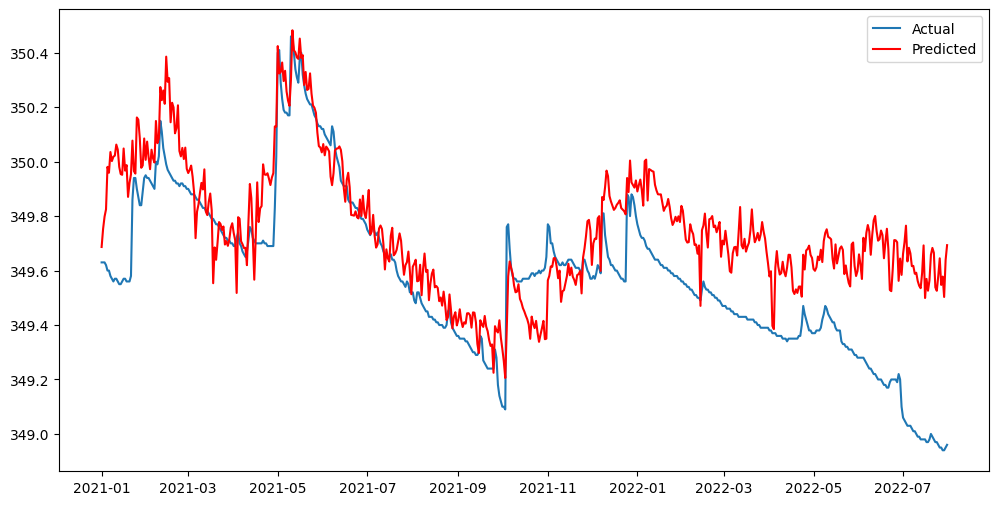

In [39]:
# test the model
y_pred_test = result.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, exog=X_test)
y_pred_test.index = y_test.index
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_test, label='Predicted', color='red')
plt.legend()
plt.show()


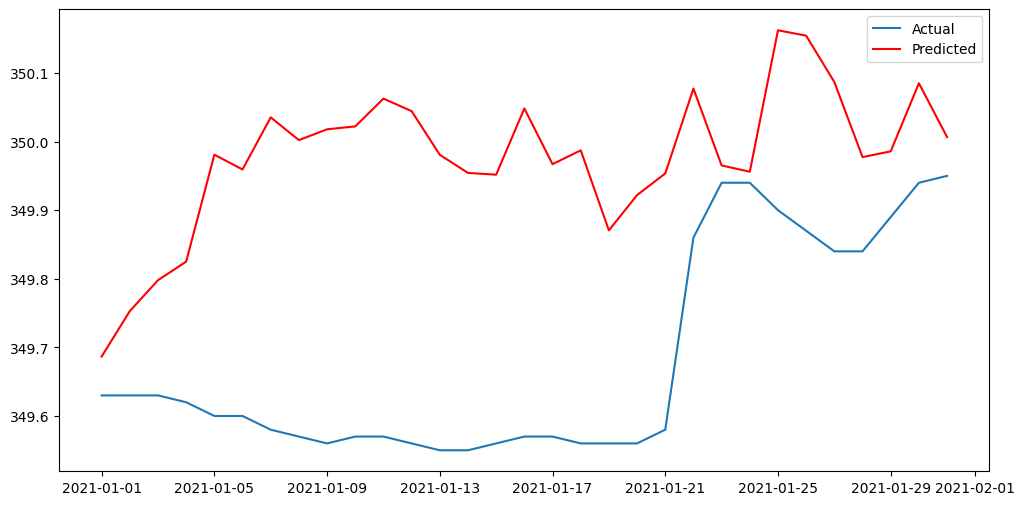

In [40]:
# test the model
y_pred_test = result.predict(start=len(y_train), end=len(y_train)+30, exog=X_test[:31])
y_pred_test.index = y_test[:31].index
plt.figure(figsize=(12,6))
plt.plot(y_test[:31], label='Actual')
plt.plot(y_pred_test, label='Predicted', color='red')
plt.legend()
plt.show()

